In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('price_review.csv')

In [3]:
df.head()

,Seller_ID,Poor communication,Good Communication,Excellent Communication,Late Delivery,Fast Delivery,Quick Delivery,Very Late Delivery,Poor Condition,good condition,excellent condition,Bad packaging,Good Packaging,Poor Service,nice service,good service,excellent service,Price Premium
0,1,6,24,100,5,92,33,4,4,359,65,8,52,3,6,39,43,6
1,2,6,12,106,7,80,23,8,0,295,114,12,74,8,22,25,53,16
2,3,3,7,83,4,108,8,0,6,346,31,0,62,4,20,21,53,19
3,4,6,23,175,4,123,36,7,13,425,100,3,55,2,30,17,56,10
4,5,3,16,129,1,75,17,0,0,257,67,1,43,4,1,42,77,93


In [4]:
y = df['Price Premium']
x = df.drop(['Seller_ID', 'Price Premium' ], axis=1)
x.columns

Index(['Poor communication', 'Good Communication', 'Excellent Communication',
       'Late Delivery', 'Fast Delivery', 'Quick Delivery',
       'Very Late Delivery', 'Poor Condition', 'good condition',
       'excellent condition', 'Bad packaging', 'Good Packaging',
       'Poor Service', 'nice service', 'good service', 'excellent service'],
      dtype='object')

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y)

In [8]:
# map features and its coef
var = x.columns.tolist()
coef = model.coef_.tolist()

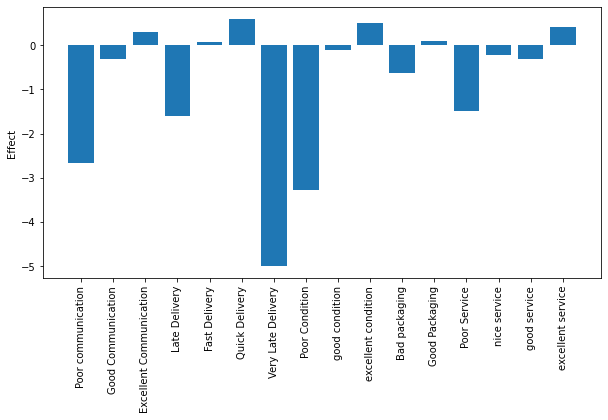

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(var, coef)
plt.ylabel('Effect')
plt.xticks(rotation=90)
plt.show()

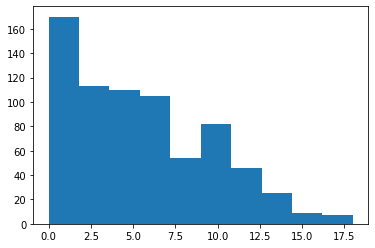

In [12]:
# We know late delivery is the worst, we want to examine our relative standing
df_vld = df['Very Late Delivery']

plt.figure()
plt.hist(df_vld)
plt.show()

In [13]:
print(np.mean(df_vld))
print(np.median(df_vld))
print(np.percentile(df_vld, 90))

5.3134535367545075
5.0
11.0


In [15]:
from scipy import stats
mynum = df_vld[234]

In [16]:
stats.percentileofscore(df_vld, mynum)

79.6116504854369